In [6]:
import onnxruntime as rt
from sklearn.metrics import accuracy_score
from scipy.stats import wilcoxon
import pandas as pd
import numpy as np
from testing.testing import *


In [7]:
# First we load the models and the data 
data = pd.read_csv('data/investigation_train_large_checked.csv')
y = data['checked']
X = data.drop(['checked', 'Ja', 'Nee'], axis=1)
X = X.astype(np.float32)


df = pd.read_csv('data/investigation_train_large_checked.csv')
data2 = pd.read_csv('data/investigation_train_large_checked.csv')

# Let's specify the features and the target
y2 = data2['checked']
X2 = data2.drop(['checked', 'Ja', 'Nee'], axis=1)
X2 = X2.astype(np.float32)


model1 = rt.InferenceSession("model_1/model_1.onnx")
model2 = rt.InferenceSession("model_2/model_2.onnx")


# Mutation testing

In [8]:
mutationTestResults_1 = mutationTest(model1,X,y,10)
mutationTestResults_2 = mutationTest(model2,X2,y2,10)
compareAccuracies(mutationTestResults_1,mutationTestResults_2)


Run 1/10
Initial accuracy: 0.9177 for model
Model Accuracy altered: 0.7130

Run 2/10
Initial accuracy: 0.9138 for model
Model Accuracy altered: 0.7106

Run 3/10
Initial accuracy: 0.9150 for model
Model Accuracy altered: 0.7168

Run 4/10
Initial accuracy: 0.9181 for model
Model Accuracy altered: 0.7105

Run 5/10
Initial accuracy: 0.9157 for model
Model Accuracy altered: 0.7154

Run 6/10
Initial accuracy: 0.9172 for model
Model Accuracy altered: 0.7145

Run 7/10
Initial accuracy: 0.9170 for model
Model Accuracy altered: 0.7134

Run 8/10
Initial accuracy: 0.9200 for model
Model Accuracy altered: 0.7150

Run 9/10
Initial accuracy: 0.9147 for model
Model Accuracy altered: 0.7111

Run 10/10
Initial accuracy: 0.9158 for model
Model Accuracy altered: 0.7141

Run 1/10
Initial accuracy: 0.9275 for model
Model Accuracy altered: 0.7640

Run 2/10
Initial accuracy: 0.9260 for model
Model Accuracy altered: 0.7608

Run 3/10
Initial accuracy: 0.9279 for model
Model Accuracy altered: 0.7603

Run 4/10
I

In [9]:
# Wilcoxon Test
stat, p_value = wilcoxon(mutationTestResults_1['model'], mutationTestResults_1['model_mutated'])
print("\nWilcoxon Test Results for Model 1:")
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in performance between original and mutated models.")
else:
    print("No significant difference in performance between original and mutated models.")

 # Wilcoxon Test
stat, p_value = wilcoxon(mutationTestResults_2['model'], mutationTestResults_2['model_mutated'])
print("\nWilcoxon Test Results for Model 2:")
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in performance between original and mutated models.")
else:
    print("No significant difference in performance between original and mutated models.")


Wilcoxon Test Results for Model 1:
Statistic: 0.0000, P-value: 0.0020
Significant difference in performance between original and mutated models.

Wilcoxon Test Results for Model 2:
Statistic: 0.0000, P-value: 0.0020
Significant difference in performance between original and mutated models.


# Differentiation/metamorphic? Testing


In [10]:
features_to_modify = ['contacten_soort_document__uitgaand_' , 'afspraak_aantal_woorden' ,'persoon_leeftijd_bij_onderzoek','relatie_kind_leeftijd_verschil_ouder_eerste_kind']

metrics = differentiationTesting(model1,X,y,0.2,features_to_modify,10)
metrics2 = differentiationTesting(model2,X2,y2,0.2,features_to_modify,10)
print_average_metrics(metrics,metrics2)


Run 1/10

Run 2/10

Run 3/10

Run 4/10

Run 5/10

Run 6/10

Run 7/10

Run 8/10

Run 9/10

Run 10/10

Run 1/10

Run 2/10

Run 3/10

Run 4/10

Run 5/10

Run 6/10

Run 7/10

Run 8/10

Run 9/10

Run 10/10
Average Metrics Across Runs:

Model 1:
accuracy_before: 0.92
accuracy_after: 0.90
tp_before: 1782.50
tp_after: 1870.50
fp_before: 72.40
fp_after: 628.70
tn_before: 22046.30
tn_after: 21490.00
fn_before: 2098.80
fn_after: 2010.80

Model 2:
accuracy_before: 0.93
accuracy_after: 0.89
tp_before: 2914.80
tp_after: 2960.50
fp_before: 918.90
fp_after: 1943.50
tn_before: 21199.80
tn_after: 20175.20
fn_before: 966.50
fn_after: 920.80


In [11]:
features_to_modify = ['relatie_overig_actueel_vorm__kostendeler' , 'relatie_overig_kostendeler' ,'relatie_kind_heeft_kinderen']

metrics = differentiationTesting(model1,X,y,0.2,features_to_modify,10)
metrics2 = differentiationTesting(model2,X2,y2,0.2,features_to_modify,10)
print_average_metrics(metrics,metrics2)


Run 1/10

Run 2/10

Run 3/10

Run 4/10

Run 5/10

Run 6/10

Run 7/10

Run 8/10

Run 9/10

Run 10/10

Run 1/10

Run 2/10

Run 3/10

Run 4/10

Run 5/10

Run 6/10

Run 7/10

Run 8/10

Run 9/10

Run 10/10
Average Metrics Across Runs:

Model 1:
accuracy_before: 0.92
accuracy_after: 0.91
tp_before: 1782.50
tp_after: 1712.00
fp_before: 72.40
fp_after: 123.90
tn_before: 22046.30
tn_after: 21994.80
fn_before: 2098.80
fn_after: 2169.30

Model 2:
accuracy_before: 0.93
accuracy_after: 0.92
tp_before: 2914.80
tp_after: 2810.60
fp_before: 918.90
fp_after: 970.70
tn_before: 21199.80
tn_after: 21148.00
fn_before: 966.50
fn_after: 1070.70


# Equivalence partitioning 

In [12]:
print("Top 5 worst performing features for model 1: ")
model1_results = calculateEPHighestDifference(data,model1)
print(model1_results)


print("Top 5 worst performing features for model 2: ")
model2_results = calculateEPHighestDifference(data2,model2)
print(model2_results)



Top 5 worst performing features for model 1: 
                                         feature  accuracy_difference  \
195  instrument_reden_beeindiging_historie_other             0.927877   
93              contacten_onderwerp__werk_intake             0.433473   
163                       contacten_soort_anders             0.312500   
135          contacten_onderwerp_inname_aanvraag             0.254150   
283                  relatie_kind_huidige_aantal             0.253600   

                                            accuracies  
195  [0.9278767933737613, 0.9111208938004736, 0.891...  
93   [0.9334728763300192, 0.9075933728260526, 0.854...  
163  [0.8908703656907693, 0.925105590808095, 0.8613...  
135  [0.9208169454579918, 0.8983334694877869, 0.666...  
283  [0.9202665145128932, 0.8985897639042941, 0.891...  
Top 5 worst performing features for model 2: 
                                      feature  accuracy_difference  \
93           contacten_onderwerp__werk_intake            


Run 1

Run 1


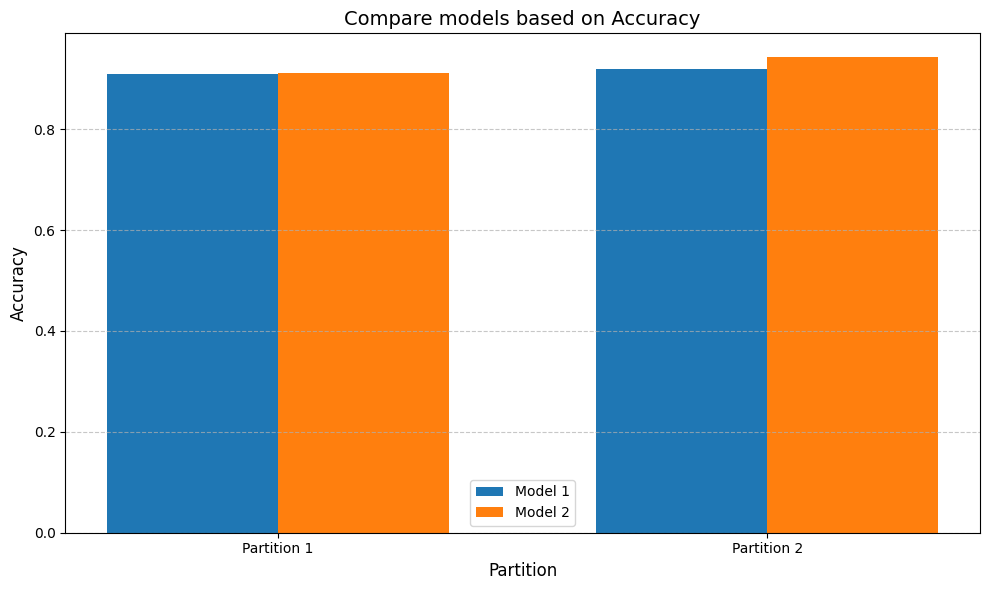

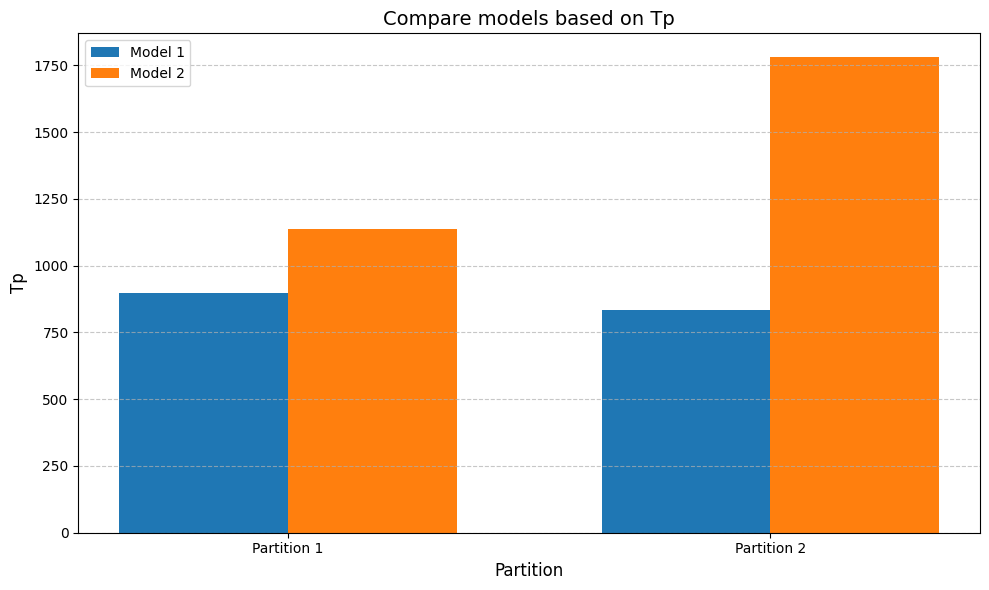

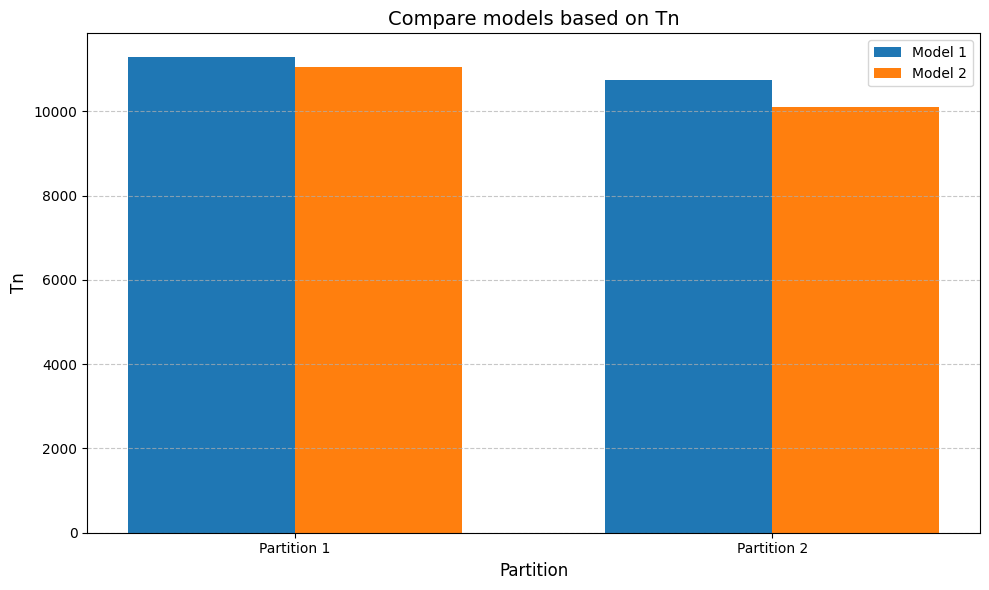

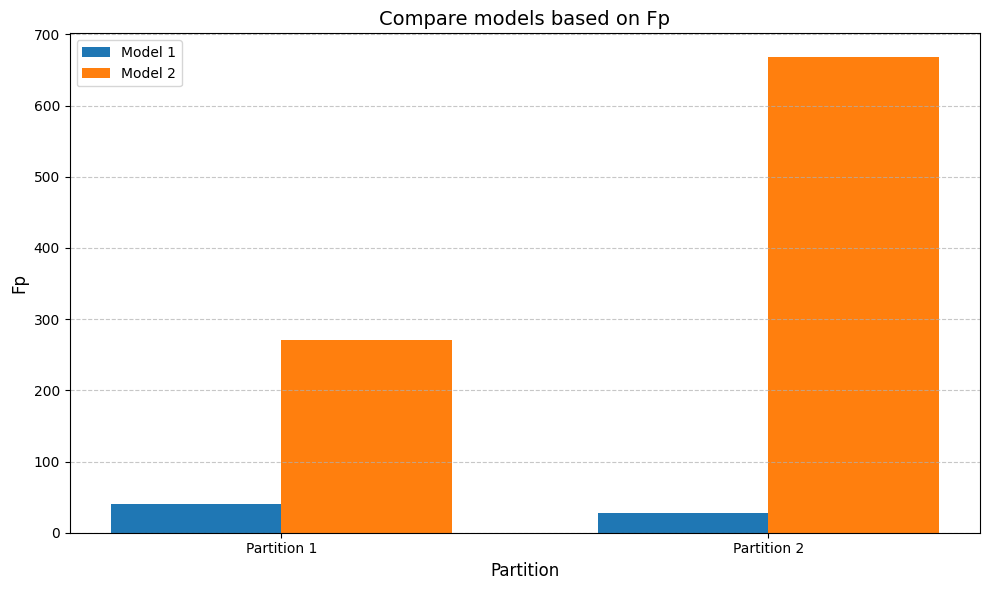

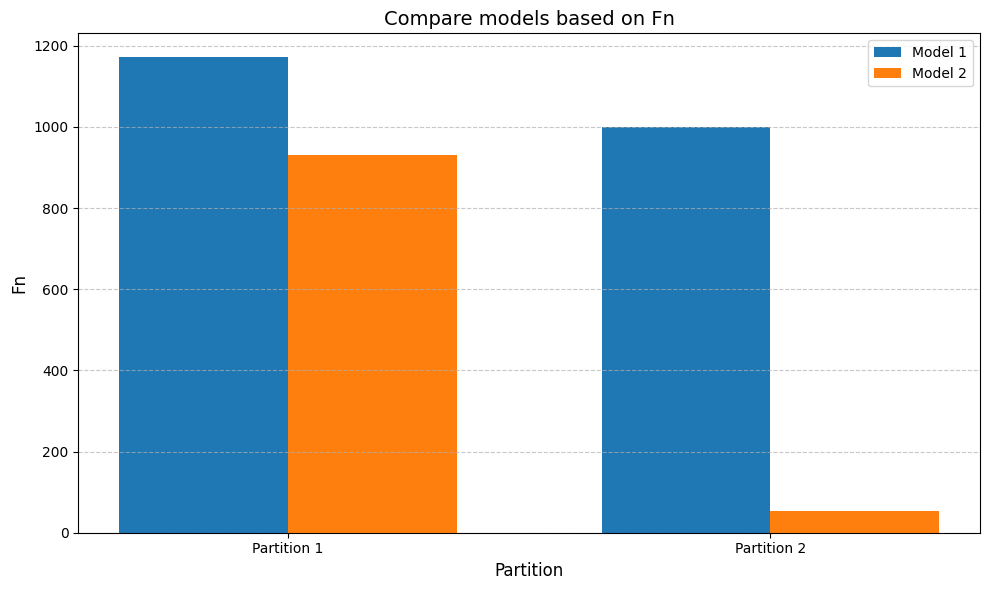

In [13]:
gender_partitions = [
    {"name": "Man", "condition": lambda df: df['persoon_geslacht_vrouw'] < 1},
    {"name": "Woman", "condition": lambda df: (df['persoon_geslacht_vrouw'] >= 1)}
    
]

EPResults = equivalencePartitioning(model1,X,y,gender_partitions,1)
EPResults2 = equivalencePartitioning(model2,X2,y2,gender_partitions,1)

plot_EP_results(EPResults, EPResults2, 'accuracy')
plot_EP_results(EPResults, EPResults2, 'tp')
plot_EP_results(EPResults, EPResults2, 'tn')
plot_EP_results(EPResults, EPResults2, 'fp')
plot_EP_results(EPResults, EPResults2, 'fn')


Run 1

Run 1


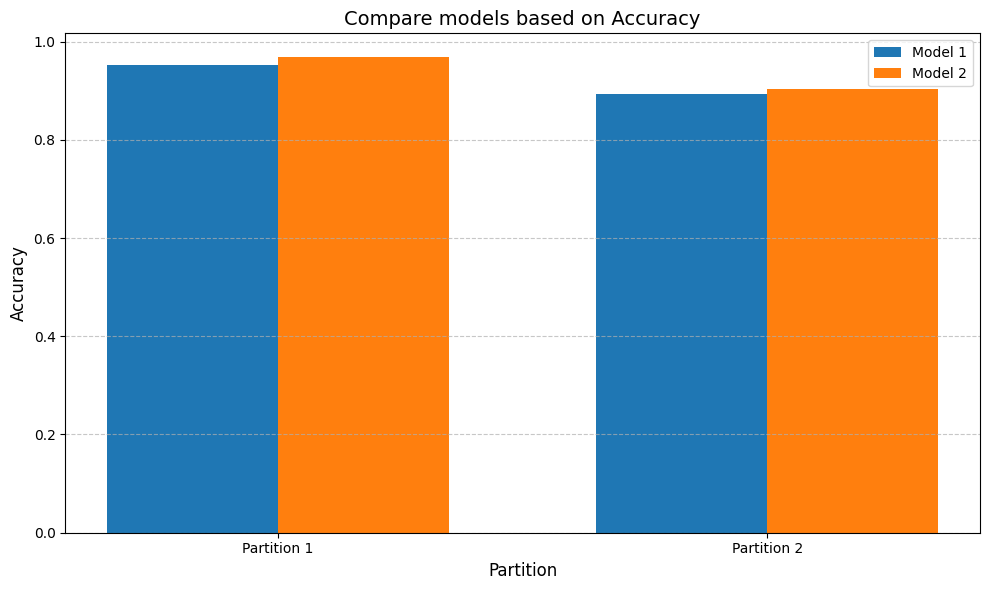

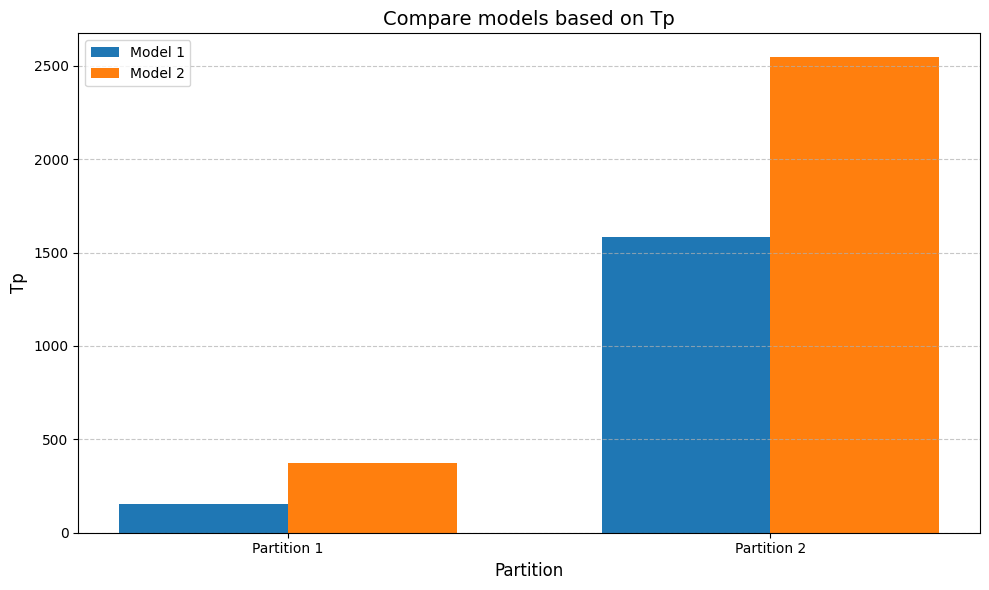

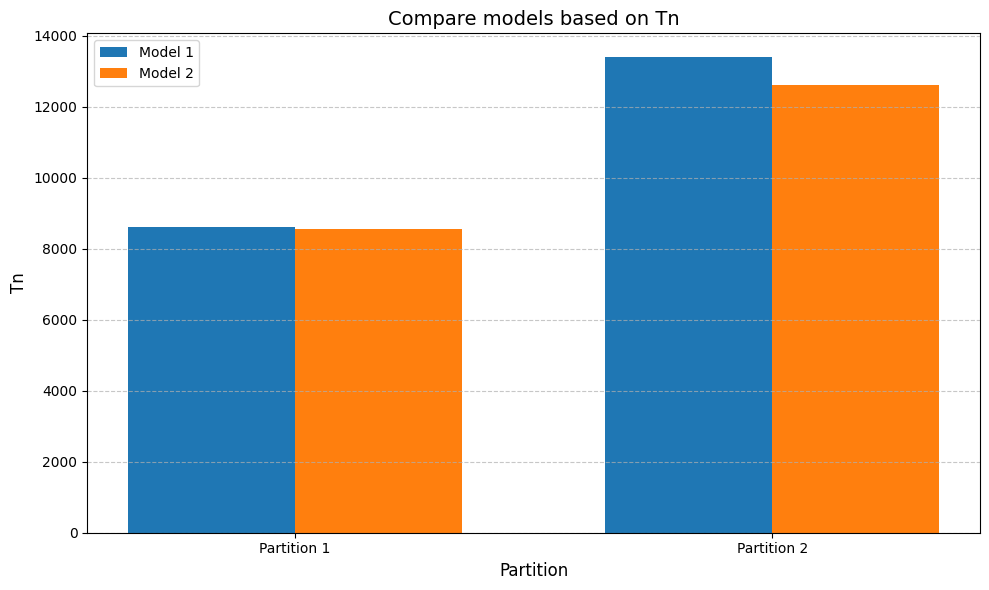

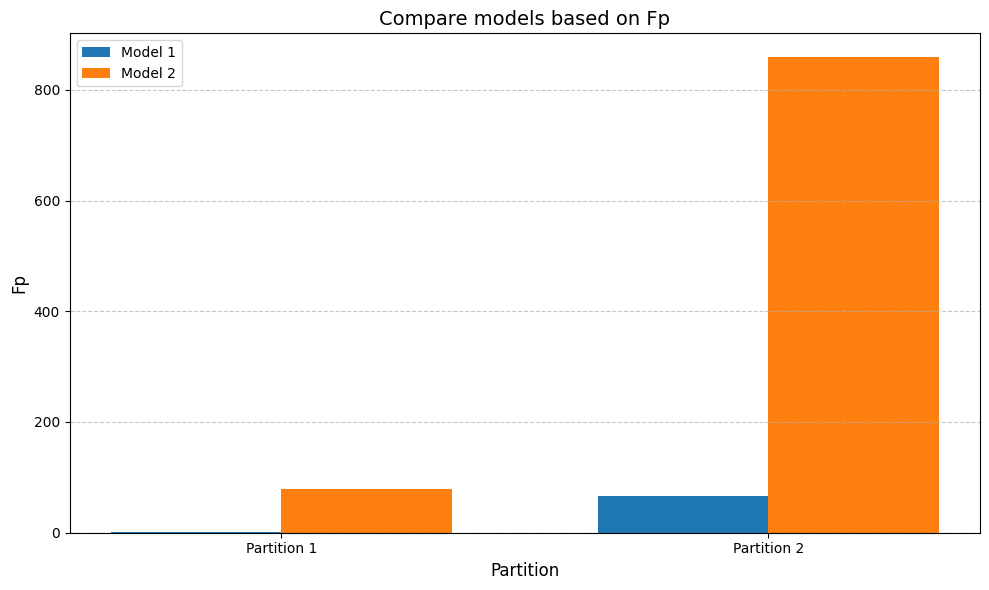

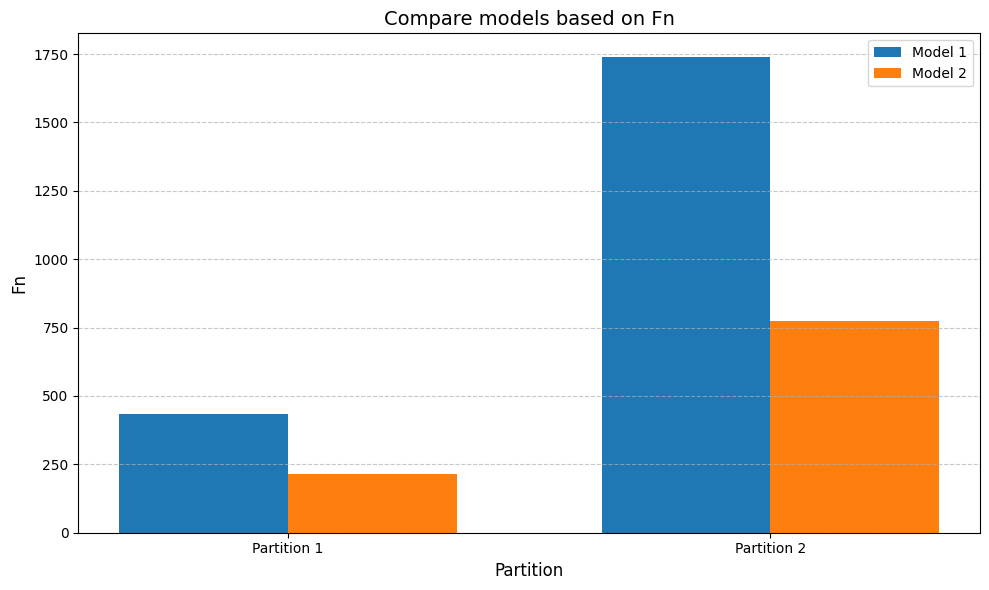

In [14]:
kostendeler_partitions = [
    {"name": "Geen Kostendeler", "condition": lambda df: df['relatie_overig_actueel_vorm__kostendeler'] < 1},
    {"name": "Wel Kostendeler", "condition": lambda df: (df['relatie_overig_actueel_vorm__kostendeler'] >= 1)}
    
]

EPResults = equivalencePartitioning(model1,X,y,kostendeler_partitions,1)
EPResults2 = equivalencePartitioning(model2,X2,y2,kostendeler_partitions,1)

plot_EP_results(EPResults, EPResults2, 'accuracy')
plot_EP_results(EPResults, EPResults2, 'tp')
plot_EP_results(EPResults, EPResults2, 'tn')
plot_EP_results(EPResults, EPResults2, 'fp')
plot_EP_results(EPResults, EPResults2, 'fn')


Run 1

Run 1


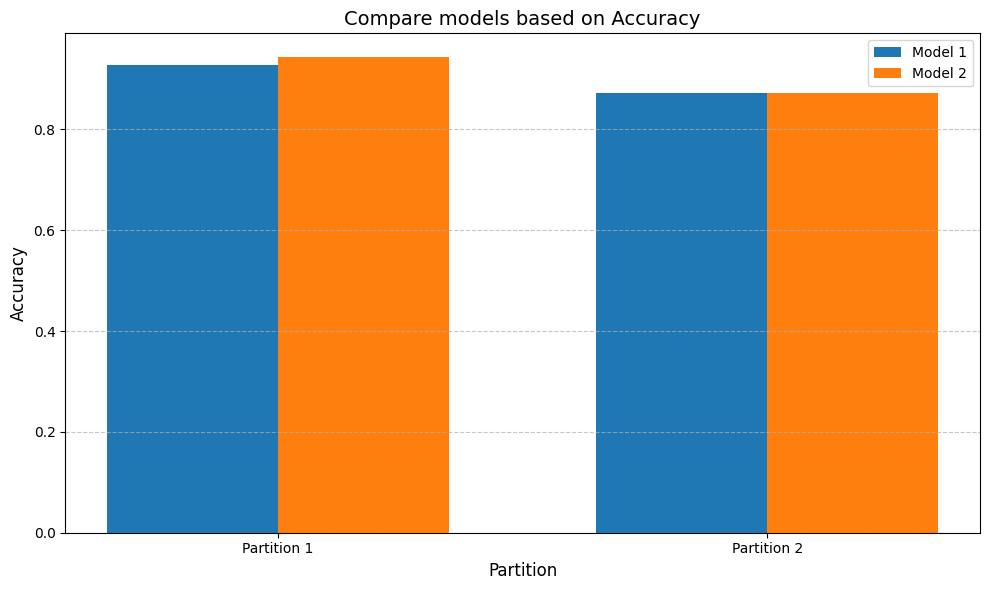

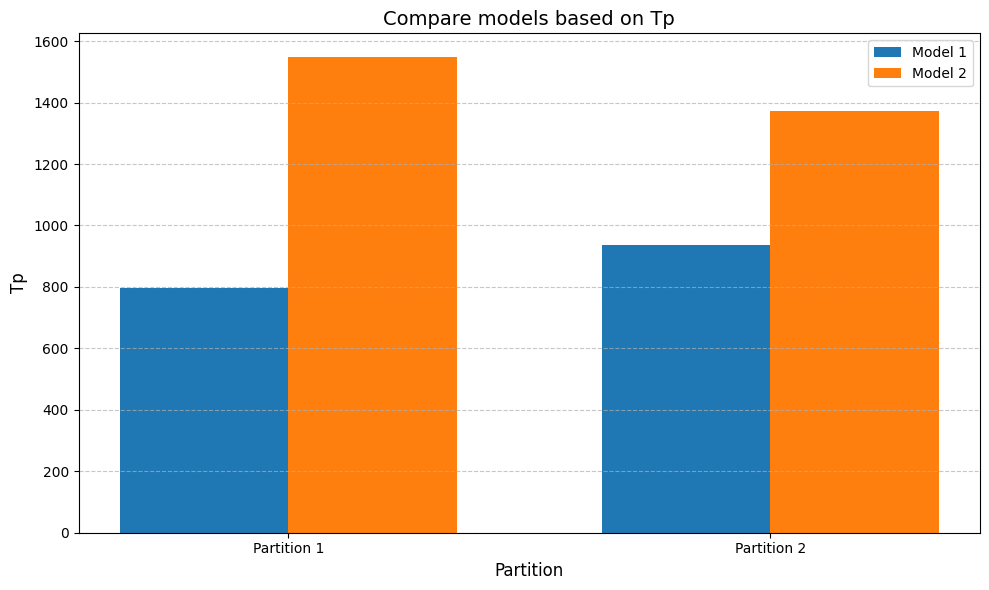

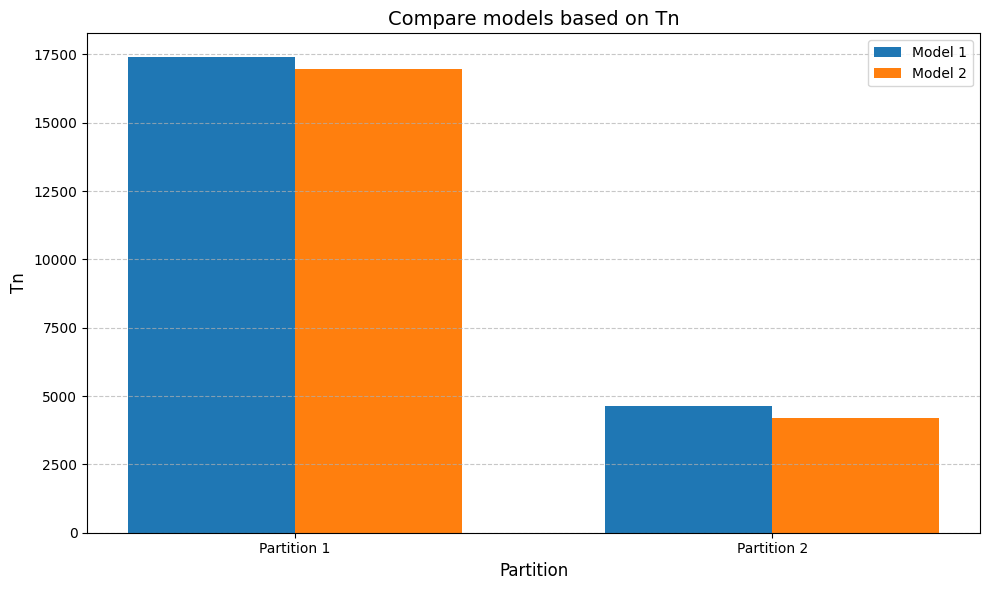

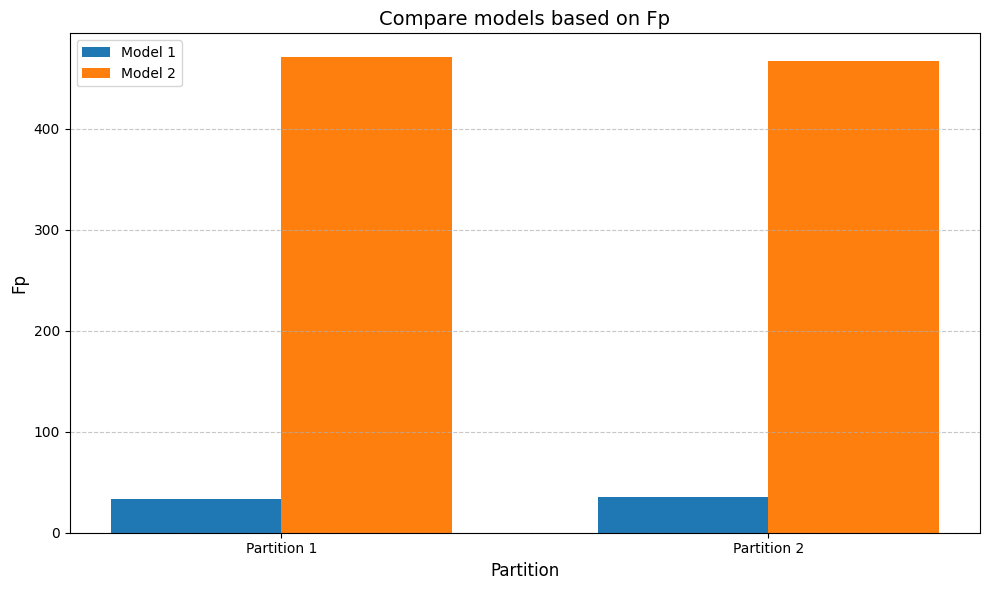

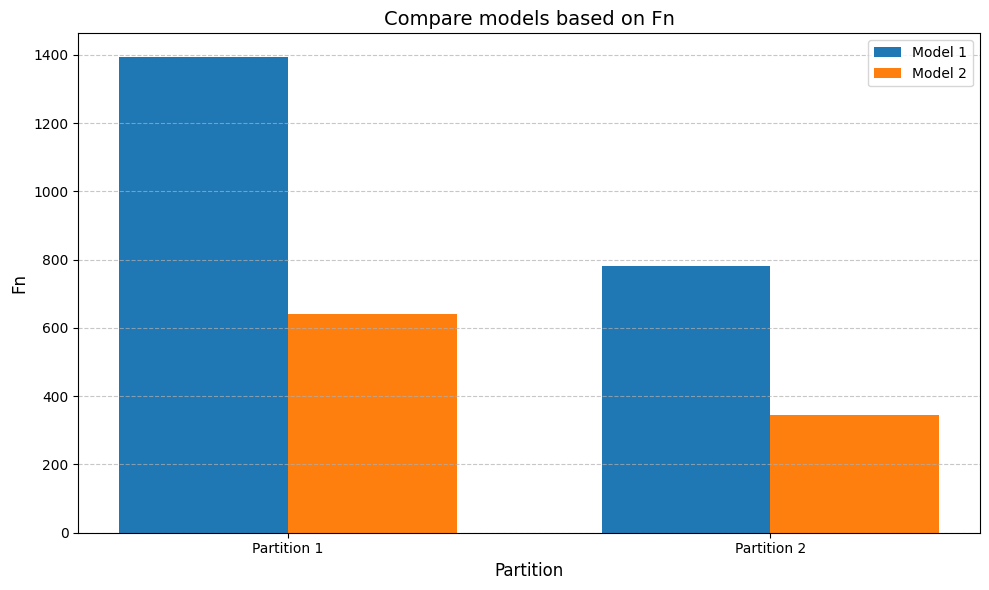

In [15]:
kostendeler_partitions = [
    {"name": "Geen Kostendeler", "condition": lambda df: df['relatie_overig_kostendeler'] < 1},
    {"name": "Wel Kostendeler", "condition": lambda df: (df['relatie_overig_kostendeler'] >= 1)}
    
]

EPResults = equivalencePartitioning(model1,X,y,kostendeler_partitions,1)
EPResults2 = equivalencePartitioning(model2,X2,y2,kostendeler_partitions,1)

plot_EP_results(EPResults, EPResults2, 'accuracy')
plot_EP_results(EPResults, EPResults2, 'tp')
plot_EP_results(EPResults, EPResults2, 'tn')
plot_EP_results(EPResults, EPResults2, 'fp')
plot_EP_results(EPResults, EPResults2, 'fn')


Run 1

Run 1


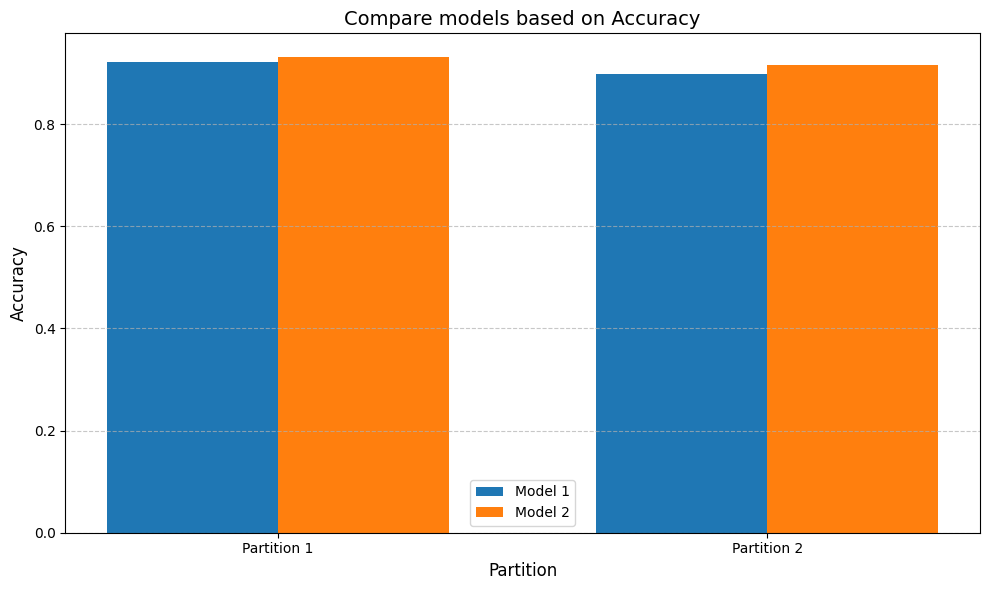

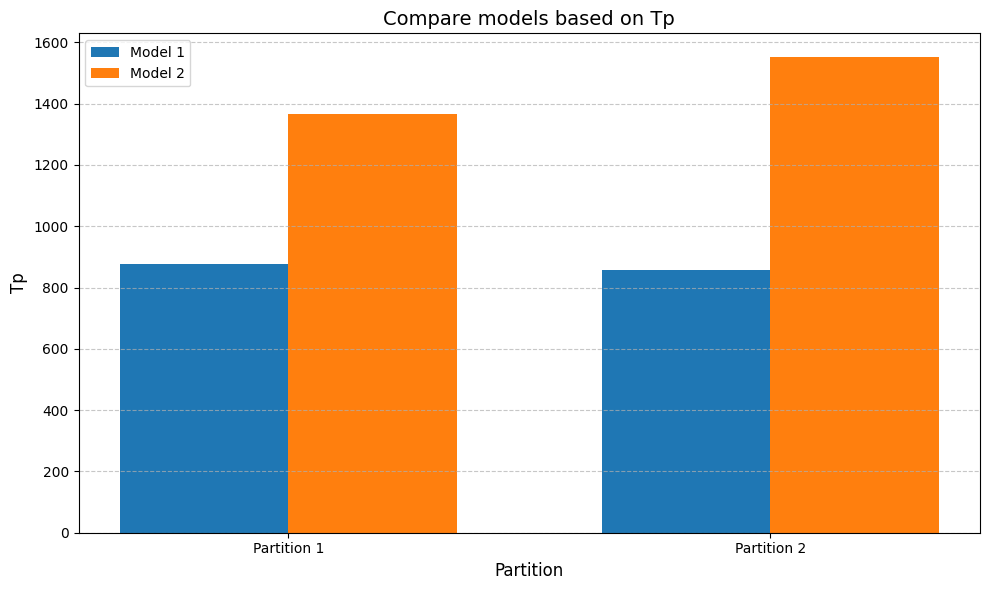

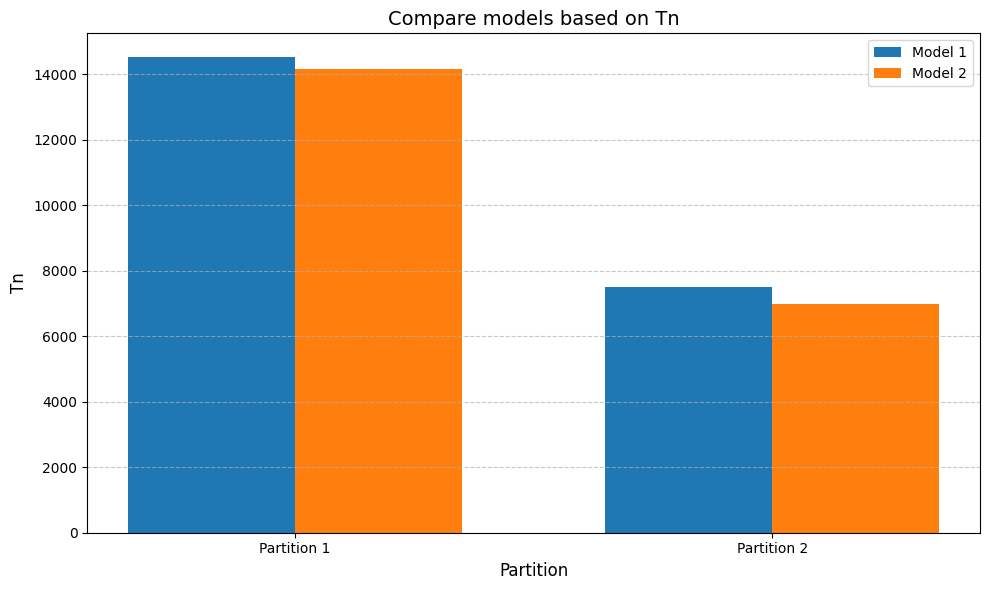

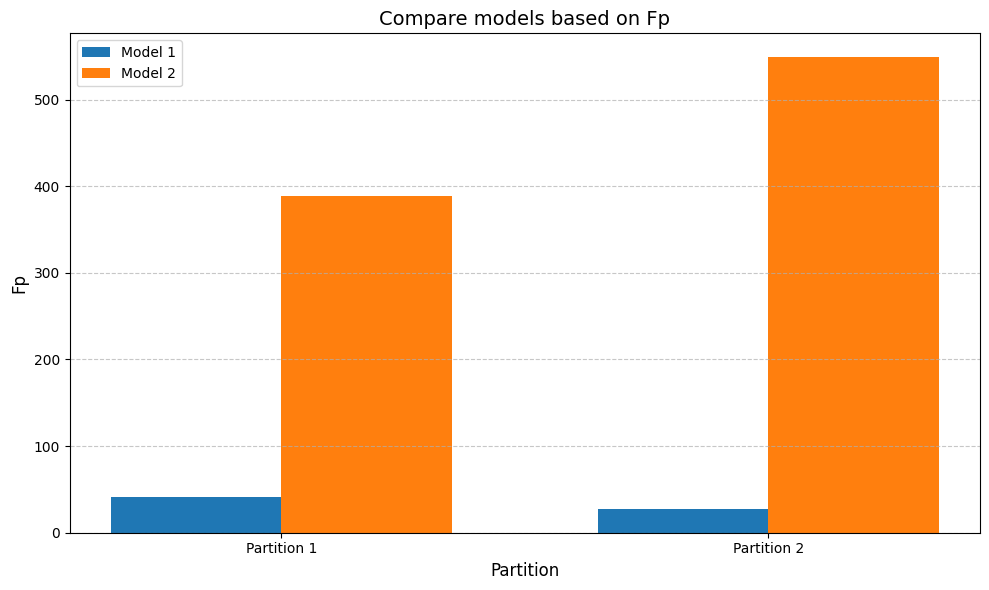

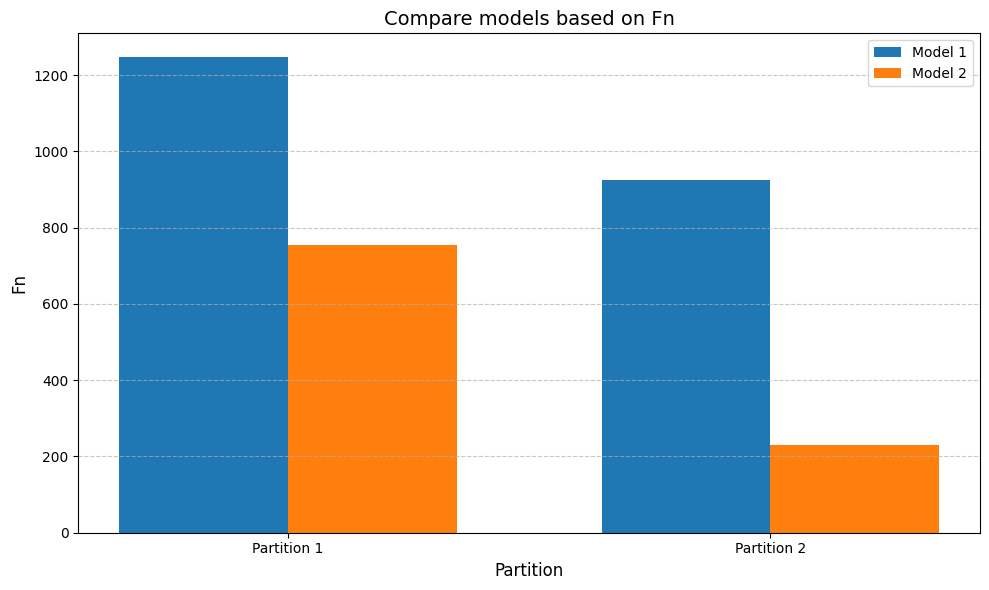

In [16]:
kinderen_partitions = [
    {"name": "Geen kinderen", "condition": lambda df: df['relatie_kind_heeft_kinderen'] < 1},
    {"name": "Wel kinderen", "condition": lambda df: (df['relatie_kind_heeft_kinderen'] >= 1)}
    
]

EPResults = equivalencePartitioning(model1,X,y,kinderen_partitions,1)
EPResults2 = equivalencePartitioning(model2,X2,y2,kinderen_partitions,1)

plot_EP_results(EPResults, EPResults2, 'accuracy')
plot_EP_results(EPResults, EPResults2, 'tp')
plot_EP_results(EPResults, EPResults2, 'tn')
plot_EP_results(EPResults, EPResults2, 'fp')
plot_EP_results(EPResults, EPResults2, 'fn')